Find most commin words in whole dataset as well as in positive, negative and neutral datasets.

In [2]:
from sk import *
freq_words(read_data2(),10)

Top 10 words from whole set: ['u', 'tomorrow', 'go', 'th', 'c', 'may', 'day', 'night', 'see', 'get']
Top 10 words from positive set: ['u', 'tomorrow', 'go', 'th', 'day', 'c', 'may', 'see', 'night', 'good']
Top 10 words from negative set: ['u', 'may', 'tomorrow', 'go', 'c', 'th', 'like', 'day', 'get', 'st']
Top 10 words from neutral set: ['u', 'tomorrow', 'go', 'th', 'c', 'may', 'day', 'night', 'time', 'st']


Presenting results in WordClouds

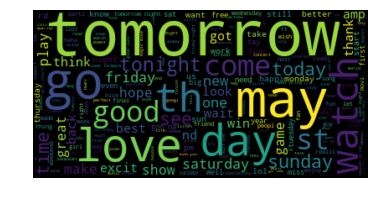

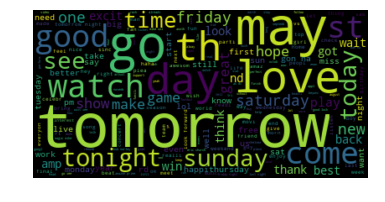

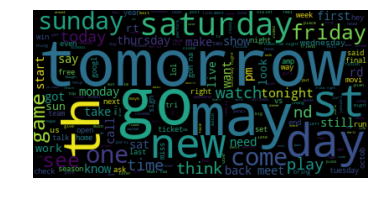

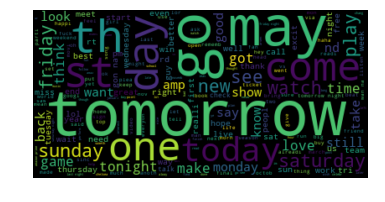

In [4]:
from sk import *

def word_clouds(data_list):
    #convert list of words to string
    positive = " ".join(data_list[0])
    plot_wordCloud(WordCloud().generate(positive))
    negative = " ".join(data_list[1])
    plot_wordCloud(WordCloud().generate(positive))
    neutral = " ".join(data_list[2])
    plot_wordCloud(WordCloud().generate(neutral))
    total = " ".join(data_list[0] + data_list[1] + data_list[2])
    plot_wordCloud(WordCloud().generate(total))

def plot_wordCloud(wordcloud):
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

word_clouds(read_data2())

Executing svm for bag of words:

In [2]:
from svm import *

def bow(all_tweets,labels,vocab,valid_labels):
    vectorizer = CountVectorizer()
    bow_xtrain = vectorizer.fit_transform(all_tweets) # bag of words features for train data
    
    if os.path.isfile('bow_train.pkl') :
        infile = open("bow_train.pkl",'rb')
        svc=pickle.load(infile)
        infile.close()
    else:
        outfile = open("bow_train.pkl",'wb')
        svc = svm.SVC(kernel='linear', C=1, probability=True)
        svc = svc.fit(bow_xtrain, labels) # labels: train data labels
        pickle.dump(svc,outfile)
        outfile.close()

    test = vectorizer.transform(vocab)
    prediction = svc.predict(test) # predict on the validation set
    score = f1_score(prediction, valid_labels, average='micro')
    print(score)

0.5522631064799739


Executing knn for bag of words:

In [1]:
from knn import *

def bow(all_tweets,labels,vocab,valid_labels):
    vectorizer = CountVectorizer()
    bow_xtrain = vectorizer.fit_transform(all_tweets) # bag of words features for train data
    
    if os.path.isfile('bow_knn.pkl') :
        infile = open("bow_knn.pkl",'rb')
        knn=pickle.load(infile)
        infile.close()
    else:
        outfile = open("bow_knn.pkl",'wb')
        knn = KNeighborsClassifier(n_neighbors = 5)
        knn.fit(bow_xtrain, labels) # labels: train data labels
        pickle.dump(knn,outfile)
        outfile.close()

    test=vectorizer.transform(vocab)
    prediction=knn.predict(test) # predict on the validation set
    score=f1_score(prediction, valid_labels, average='micro')
    print(score)

0.4483881471833279


Executing svm for tf_idf:

In [3]:
from svm import *

def tf_idf(all_tweets,labels,vocab,valid_labels):
    
    tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
    txt_fitted = tf.fit(all_tweets)
    txt_transformed = txt_fitted.transform(all_tweets) #tf_idf features for train data
    idf = tf.idf_
    
    rr = dict(zip(txt_fitted.get_feature_names(), idf))
    
    if os.path.isfile('td_idf_train.pkl'):
        infile = open("td_idf_train.pkl",'rb')
        svc=pickle.load(infile)
        infile.close()
    else:
        outfile = open("td_idf_train.pkl",'wb')
        svc = svm.SVC(kernel='linear', C=1, probability=True)
        svc = svc.fit(txt_transformed, labels) # labels: train data labels
        pickle.dump(svc,outfile)
        outfile.close()
    
    test = txt_fitted.transform(vocab)
    prediction = svc.predict(test) # predict on the validation set
    score = f1_score(prediction, valid_labels, average='micro')
    print(score)

0.5111527189840442


Executing knn for tf_idf:

In [3]:
from knn import *

def tf_idf(all_tweets,labels,vocab,valid_labels):
    
    tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
    txt_fitted = tf.fit(all_tweets)
    txt_transformed = txt_fitted.transform(all_tweets) #tf_idf features for train data
    idf = tf.idf_

    rr = dict(zip(txt_fitted.get_feature_names(), idf))
    
    if os.path.isfile('td_idf_knn.pkl') :
        infile = open("td_idf_knn.pkl",'rb')
        knn=pickle.load(infile)
        infile.close()
    else:
        outfile = open("td_idf_knn.pkl",'wb')
        knn = KNeighborsClassifier(n_neighbors = 5)
        knn.fit(txt_transformed, labels) # labels: train data labels
        pickle.dump(knn,outfile)
        outfile.close()
    
    test=txt_fitted.transform(vocab)
    prediction=knn.predict(test) # predict on the validation set
    score=f1_score(prediction, valid_labels, average='micro')
    print(score)

0.48559101269944643


Executing svm for word_embeddings with size = 1000 (+extra features: length of tweets and words' max values from  all dictionaries):

In [20]:
from svm import *

def word_embeddings(all_tweets,labels,vocab,valid_labels):

    clean_tweet = all_tweets.apply(lambda x: clean_data(x))

    model = gensim.models.Word2Vec(clean_tweet, size=1000, window=5, min_count=2, sg=1, hs=0, negative=10, workers=2, seed=34)
    model.train(clean_tweet, total_examples=len(clean_tweet), epochs=20)

    if os.path.isfile('we_train.pkl') :
        infile = open("we_train.pkl",'rb')
        svc=pickle.load(infile)
        infile.close()
    else:
        all_vectors = create_vectors(model,clean_tweet)
        outfile = open("we_train.pkl",'wb')
        svc = svm.SVC(kernel='linear', C=1, probability=True)
        svc = svc.fit(all_vectors, labels)
        pickle.dump(svc,outfile)
        outfile.close()
    
    test = create_vectors(model,vocab)
    prediction = svc.predict(test) #predict on the validation set
    score = f1_score(prediction, valid_labels, average='micro')
    print(score)
    return score


0.5215040977326687


Executing knn for word_embeddings with size = 1000 (+extra features: length of tweets and words' max values from  all dictionaries):

/home/msiampou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


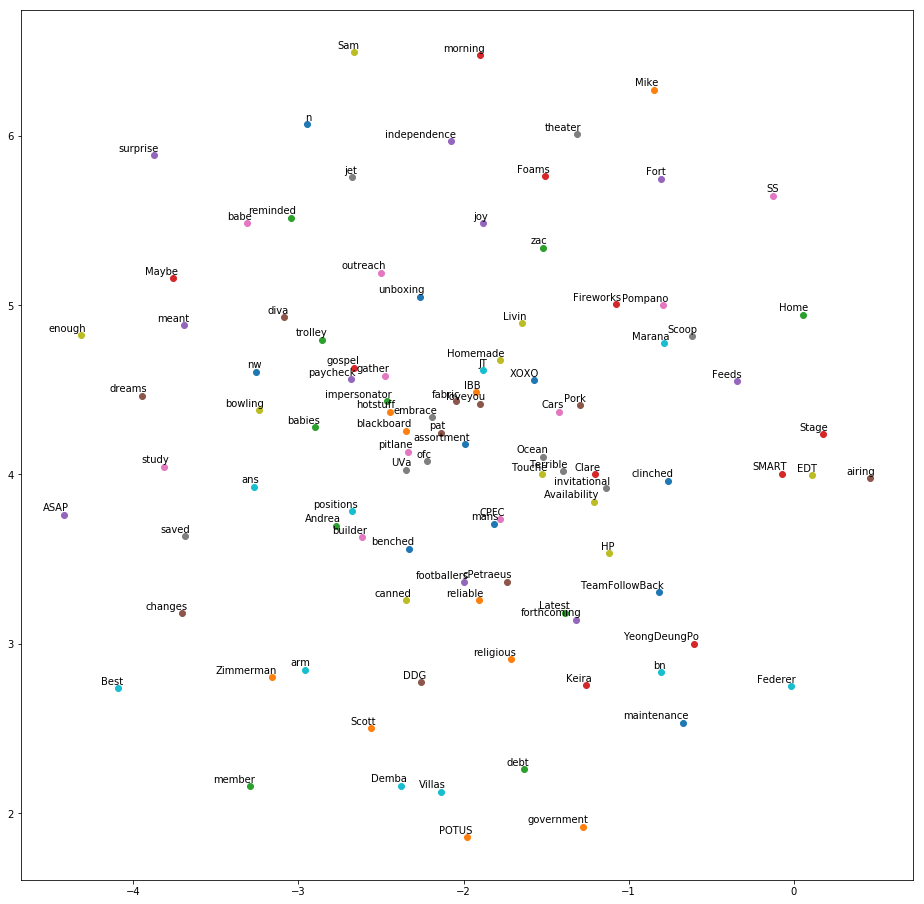

0.4188375122110062


In [2]:
from knn import *

def word_embeddings(all_tweets,labels,vocab,valid_labels):
    
    clean_tweet = all_tweets.apply(lambda x: clean_data(x)) # minimum cleaning of data
    
    model = gensim.models.Word2Vec(clean_tweet, size=1000, window=5, min_count=2, sg=1, hs=0, negative=10, workers=2, seed=34)
    model.train(clean_tweet, total_examples=len(clean_tweet), epochs=20)
    
    tsne_plot(model) # plot model

    if os.path.isfile('we_knn.pkl') :
        infile = open("we_knn.pkl",'rb')
        knn=pickle.load(infile)
        infile.close()
    else:
        all_vectors = create_vectors(model,clean_tweet) # create vectors for knn algorithm
        outfile = open("we_knn.pkl",'wb')
        knn = KNeighborsClassifier(n_neighbors = 5)
        knn.fit(all_vectors, labels) 
        pickle.dump(knn,outfile)
        outfile.close()

    test = create_vectors(model,vocab)
    prediction=knn.predict(test) # predict on the validation set
    score=f1_score(prediction, valid_labels, average='micro')
    print(score)

def tsne_plot(model): # create TSNE model and plot it
    labels = []     
    tokens = []
    i=0
    for i in range(0,100): # choose 100 random words
        word = random.choice(model.wv.index2entity)
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
        xy=(x[i], y[i]),xytext=(5, 2),textcoords='offset points',ha='right',va='bottom')
    plt.show()

Executing round robin for word_embeddings with size = 1000 (+extra features: length of tweets and words' max values from  all dictionaries):

In [1]:
from rr import *

def bow(vocab,labels,vocab2,valid_labels,pos_neg,pos_neut,neg_neut,pos_negL,pos_neutL,neg_neutL):
    vectorizer = CountVectorizer()
    bow_xtrain = vectorizer.fit_transform(vocab)
    
    pn= vectorizer.transform(pos_neg)
    pnt= vectorizer.transform(pos_neut)
    nn= vectorizer.transform(neg_neut)
    
    kPN = KNeighborsClassifier(n_neighbors = 5)
    kPNT = KNeighborsClassifier(n_neighbors = 5)
    kNN = KNeighborsClassifier(n_neighbors = 5)
    
    kPN=kPN.fit(pn, pos_negL)
    kPNT=kPNT.fit(pnt, pos_neutL)
    kNN=kNN.fit(nn, neg_neutL)
    
    test=vectorizer.transform(vocab2)
    
    pn_test=kPN.predict_proba(test)
    pnt_test=kPNT.predict_proba(test)
    nn_test=kNN.predict_proba(test)
    
    pn_train=kPN.predict_proba(bow_xtrain)
    pnt_train=kPNT.predict_proba(bow_xtrain)
    nn_train=kNN.predict_proba(bow_xtrain)
    
    test=np.concatenate((nn_test,pn_test, pnt_test), axis=1)
    train = np.concatenate((nn_train,pn_train, pnt_train), axis=1)
    
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn=knn.fit(train, labels)
    prediction=knn.predict(test)
    print(f1_score(prediction, valid_labels, average='micro'))

0.37552914360143275


In [2]:
from rr import *

def tf_idf(vocab,labels,vocab2,valid_labels,pos_neg,pos_neut,neg_neut,pos_negL,pos_neutL,neg_neutL):
    
    tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
    txt_fitted = tf.fit(vocab)
    txt_transformed = txt_fitted.transform(vocab)
    idf = tf.idf_
    
    rr = dict(zip(txt_fitted.get_feature_names(), idf))
    
    pn= txt_fitted.transform(pos_neg)
    pnt= txt_fitted.transform(pos_neut)
    nn= txt_fitted.transform(neg_neut)
    
    kPN = KNeighborsClassifier(n_neighbors = 5)
    kPNT = KNeighborsClassifier(n_neighbors = 5)
    kNN = KNeighborsClassifier(n_neighbors = 5)
    
    kPN=kPN.fit(pn, pos_negL)
    kPNT=kPNT.fit(pnt, pos_neutL)
    kNN=kNN.fit(nn, neg_neutL)
    
    test=txt_fitted.transform(vocab2)
    
    pn_test=kPN.predict_proba(test)
    pnt_test=kPNT.predict_proba(test)
    nn_test=kNN.predict_proba(test)
    
    pn_train=kPN.predict_proba(txt_transformed)
    pnt_train=kPNT.predict_proba(txt_transformed)
    nn_train=kNN.predict_proba(txt_transformed)
    
    test=np.concatenate((nn_test,pn_test, pnt_test), axis=1)
    train = np.concatenate((nn_train,pn_train, pnt_train), axis=1)
    
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn=knn.fit(train, labels)
    prediction=knn.predict(test)
    
    print(f1_score(prediction, valid_labels, average='micro'))

0.44643438619342235


In [11]:
from rr import *

def word_embeddings(train_tweets,labels,test_tweets,valid_labels,pos_neg,pos_neut,neg_neut,pos_negL,pos_neutL,neg_neutL):
    
    train_tweets = train_tweets.apply(lambda x: clean_data(x))
    test_tweets = test_tweets.apply(lambda x: clean_data(x))
    
    pos_neg = pos_neg.apply(lambda x: clean_data(x))
    pos_neut = pos_neut.apply(lambda x: clean_data(x))
    neg_neut = neg_neut.apply(lambda x: clean_data(x))
    
    model2 = gensim.models.Word2Vec(pos_neg, min_count = 1, size = 1000, window = 5, sg = 1, workers = 2)
    model2.train(pos_neg, total_examples=len(pos_neg), epochs=20)
    
    all_vectors = create_vectors(model2,train_tweets)
    
    pn= create_vectors(model2,pos_neg)
    kPN = KNeighborsClassifier(n_neighbors = 5)
    kPN=kPN.fit(pn, pos_negL)
    
    test = create_vectors(model2,test_tweets)
    
    pn_test=kPN.predict_proba(test)
    pn_train=kPN.predict_proba(all_vectors)
    
    model2 = gensim.models.Word2Vec(pos_neut, min_count = 1, size = 1000, window = 5, sg = 1, workers = 2)
    model2.train(pos_neut, total_examples=len(pos_neut), epochs=20)
    
    all_vectors = create_vectors(model2,train_tweets)
    
    pnt= create_vectors(model2,pos_neut)
    test = create_vectors(model2,test_tweets)
    
    kPNT = KNeighborsClassifier(n_neighbors = 5)
    kPNT=kPNT.fit(pnt, pos_neutL)
    pnt_test=kPNT.predict_proba(test)
    pnt_train=kPNT.predict_proba(all_vectors)
    
    model2 = gensim.models.Word2Vec(neg_neut, min_count = 1, size = 1000, window = 5, sg = 1, workers = 2)
    model2.train(neg_neut, total_examples=len(neg_neut), epochs=20)
    
    all_vectors = create_vectors(model2,train_tweets)
    
    nn=  create_vectors(model2,neg_neut)
    kNN = KNeighborsClassifier(n_neighbors = 5)
    kNN=kNN.fit(nn, neg_neutL)
    
    test = create_vectors(model2,test_tweets)
    nn_test=kNN.predict_proba(test)
    nn_train=kNN.predict_proba(all_vectors)
    
    test=np.concatenate((nn_test,pn_test, pnt_test), axis=1)
    train = np.concatenate((nn_train,pn_train, pnt_train), axis=1)
    
    model2 = gensim.models.Word2Vec(train_tweets, min_count = 1, size = 1000, window = 5, sg = 1, workers = 2)
    model2.train(train_tweets, total_examples=len(train_tweets), epochs=20)
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn=knn.fit(train, labels)
    prediction=knn.predict(test)
    print(f1_score(prediction, valid_labels, average='micro'))

0.3458971019211983


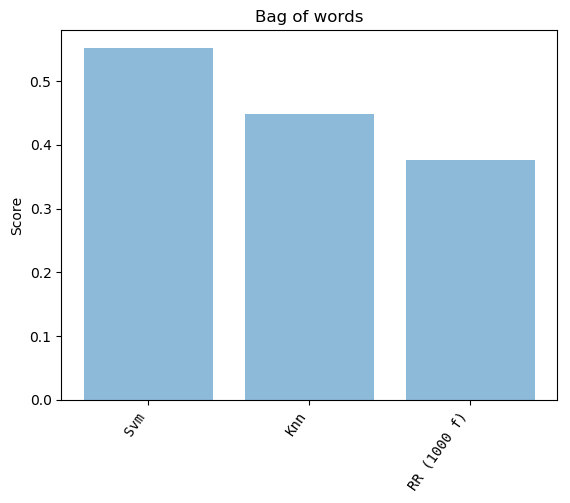

In [17]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Svm', 'Knn', 'RR (1000 f)')
y_pos = np.arange(len(objects))
score = [0.5522631064799739,0.4483881471833279,0.37552914360143275]

plt.bar(y_pos, score, align='center', alpha=0.5)
plt.xticks(y_pos, objects, ha='right', rotation=55, fontsize=10, fontname='monospace')
plt.ylabel('Score')
plt.title('Bag of words')

plt.show()

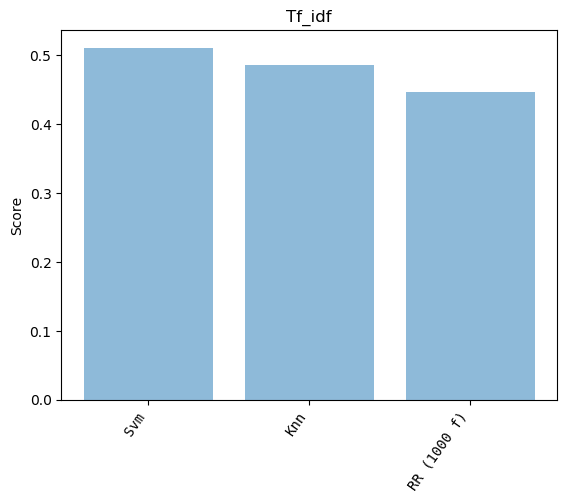

In [18]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Svm', 'Knn', 'RR (1000 f)')
y_pos = np.arange(len(objects))
score = [0.5111527189840442,0.48559101269944643,0.44643438619342235]

plt.bar(y_pos, score, align='center', alpha=0.5)
plt.xticks(y_pos, objects, ha='right', rotation=55, fontsize=10, fontname='monospace')
plt.ylabel('Score')
plt.title('Tf_idf')

plt.show()

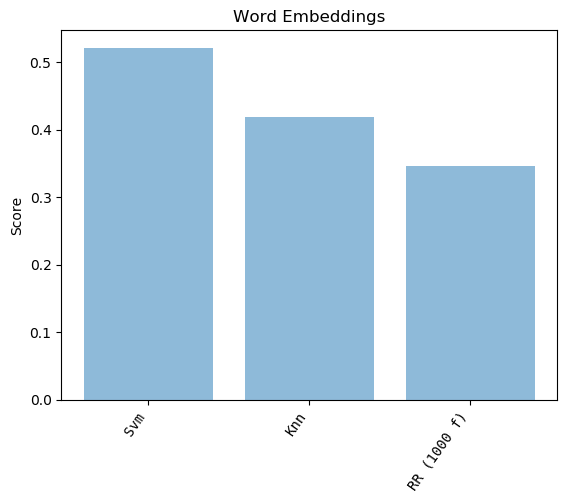

In [22]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Svm', 'Knn', 'RR (1000 f)')
y_pos = np.arange(len(objects))
score = [0.5215040977326687,0.4188375122110062,0.3458971019211983]

plt.bar(y_pos, score, align='center', alpha=0.5)
plt.xticks(y_pos, objects, ha='right', rotation=55, fontsize=10, fontname='monospace')
plt.ylabel('Score')
plt.title('Word Embeddings')

plt.show()